<a href="https://colab.research.google.com/github/antoniocruzds/Data-Analysis/blob/master/Airbnb_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline #Configurando

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
UsageError: unrecognized arguments: #Configurando


In [34]:
#Importando o DataFrame com os dados
df = pd.read_csv('/content/drive/My Drive/Analise_de_dados/Airbnb_Rio_de_Janeiro/listings.csv')
#Visualizando as primeiras linhas
df.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,191,7,251,2020-04-06,2.08,1,287


#Entendendo os Dados Apresentados
Apartir de uma análise inicial do começo desse dataframe, devemos identificar os dados, afim de melhorar o entendimento de nossa análise. 

---
##Dicionário de Variáveis

* Id - Identificador do imóvel;
* Name - Nome da propriedade;
* Host_id - Identificador do(a) dono(a) da propriedade;
* Host_name - Nome do(a) dono(a) da propriedade;
* Neighbourhood_group - (Coluna sem valor);
* Neighbourhood - Nome do bairro;
* Latitude - Latitude da propriedade;
* Longitude - Longitude da propriedade;
* Room_type - Tipo de quarto que é oferecido;
* Price - Preço de aluguel do imóvel;
* Minimum_nights - Quantidade mínima de noites para reserva;
* Number_of_reviews - Número de reviews de propriedade;
* Last_review - Data do último review;
* Reviews_per_month - Quantidade de reviews por mês;
* Calculated_host_listings_count - Quantidade de imóveis do mesmo dono;
* Availability_365 - Dias de disponibilidade em 365 dias;
---



#Análisando o DataFrame
Agora que já sabemos com quais váriaveis estamos trabalhando, vamos explorar e analisar o corpo do df

## Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?

In [19]:
#Quantidade de linhas e colunas (Variáveis/Entradas)
print(df.shape) 


(35731, 16)


In [20]:
#Verificando os tipos de variáveis presentes nas colunas
print(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


## Q2. Qual a porcentagem de valores ausentes no dataset?
A quantidade de valores nulos de um dataset, impacta diretamente em sua qualidade, assim, é importante verificar se esses valores nulos aparecem com frequencia.


In [22]:
#Verificando a quantidade de valores ausentes e ordenando de forma decrescente
p = (df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

#Mostrando em forma de %
for var, por in p.iteritems():
  print(f'{var}: {(por*100):.2f}% dos valores faltantes')

neighbourhood_group: 100.00% dos valores faltantes
reviews_per_month: 41.96% dos valores faltantes
last_review: 41.96% dos valores faltantes
name: 0.16% dos valores faltantes
host_name: 0.01% dos valores faltantes
availability_365: 0.00% dos valores faltantes
calculated_host_listings_count: 0.00% dos valores faltantes
number_of_reviews: 0.00% dos valores faltantes
minimum_nights: 0.00% dos valores faltantes
price: 0.00% dos valores faltantes
room_type: 0.00% dos valores faltantes
longitude: 0.00% dos valores faltantes
latitude: 0.00% dos valores faltantes
neighbourhood: 0.00% dos valores faltantes
host_id: 0.00% dos valores faltantes
id: 0.00% dos valores faltantes


Após a obtenção desses valores podemos observar que:

1.  A coluna neighbourhood_group tem 100% de valores nulos
2.  As colunas que apresentam um reviw tem quase metade dos dados nulos
3.  Algumas propriedades não informam o nome do dono(a)



## Q3. Qual o tipo de distribuição das variáveis?
Agora iremos analisar a distribuição das variáveis com o auxilio de histogramas:



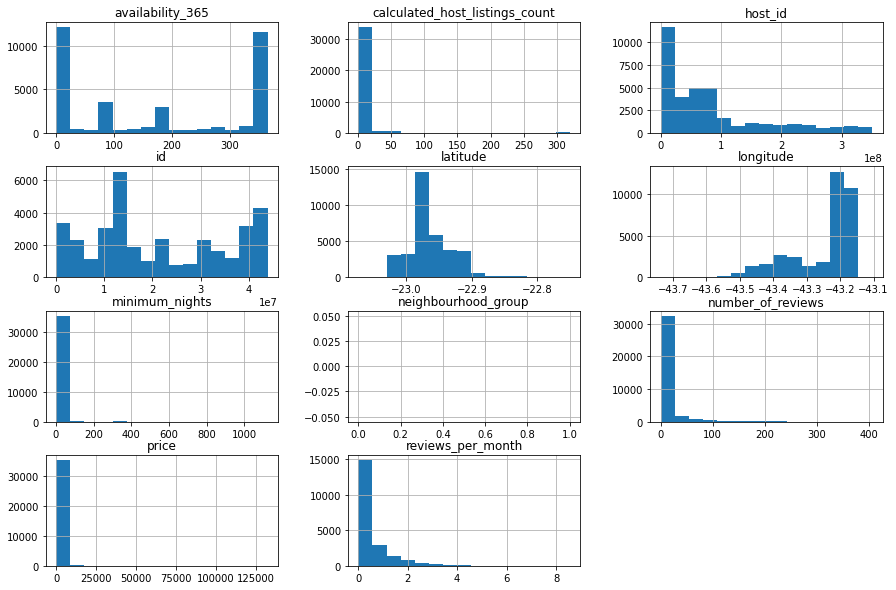

In [23]:
# plotando histogramas das variáveis numéricas
df.hist(bins=15, figsize=(15,10)); #Tamanho de 15/10

## Q4. Existem dados atípicos?
Ao examinar os histogramas podemos notar indicios da existencia de valores outliers ou "Fora da curva", que podem acabar interferindo e causar anomalias nos resultados obtidos pela análise.

Para verificar a existensia de valores desse tipo, podemos fazer dois tipos de investigação: 

1.   Resumo estatístico descritivo;
2.   Plotar boxplots para variáveis desejadas;




In [35]:
#Resumo Estatístico Descritivo
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe() #Selecioando algumas colunas

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,35731.000000,35731.000000,35731.000000,20740.000000,35731.000000,35731.000000
mean,785.857239,4.906552,9.633875,0.545509,8.073801,172.319806
std,2383.176596,22.268590,25.641165,0.729661,34.225407,154.742723
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,155.000000,1.000000,0.000000,0.110000,1.000000,0.000000
50%,300.000000,2.000000,1.000000,0.260000,1.000000,168.000000
75%,642.000000,4.000000,6.000000,0.680000,3.000000,362.000000
max,132358.000000,1123.000000,406.000000,8.550000,319.000000,365.000000


Observando o relatório estatístico podemos notar que:


*   75% dos preços de aluguel estão abaixo de 642, mas existem valores maximos de até 132358;
*   Aquantidade de maxima de noites mínimas apresenta 1123 noites.



**BoxPlot para ver a quatidade minima de noites**


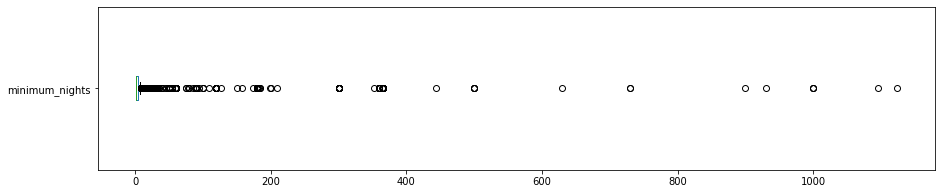

Noites Mínimas:
valores acima de 30: 247
0.6913%


In [41]:
#Noites mínimas
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

#Verificando a quantidade de valores acima de 30 dias
print("Noites Mínimas:\nvalores acima de 30: {}".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

**BoxPlot para ver o preço**

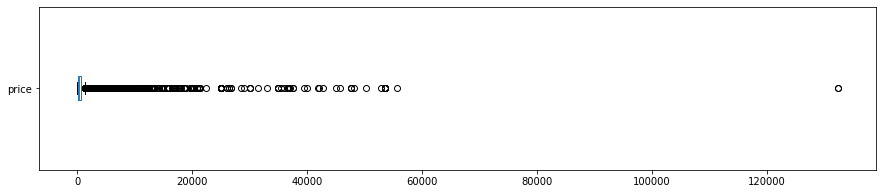

Preço:
Valores acima de 1500: 3205
8.9698%


In [43]:

# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("Preço:\nValores acima de 1500: {}".format((len(df[df.price > 1500]))))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

Analisando os Boxplots podemos observar alguns valores que fogem da normalidade, logo precisamos corrigi-los antes de proseguir

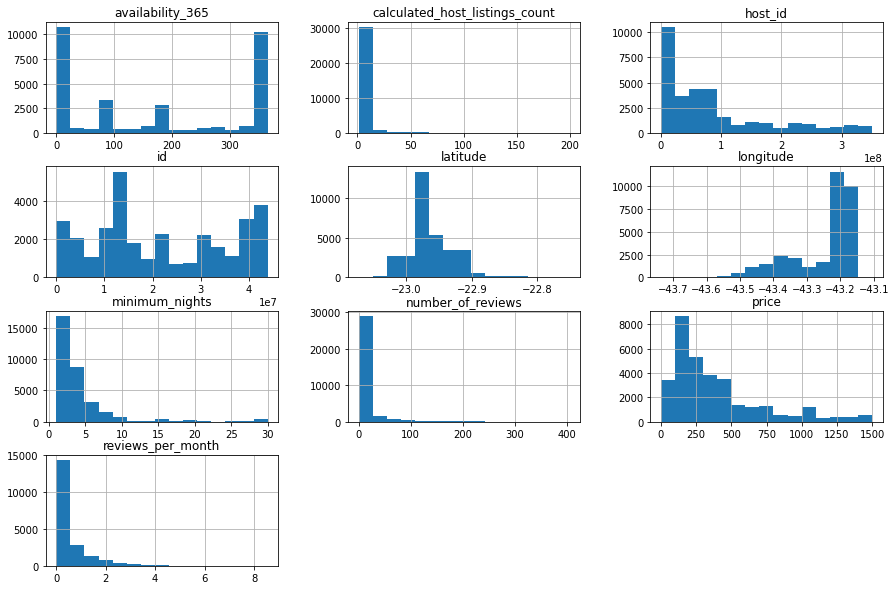

In [44]:
#Removendo os valores atípicos e armazenando em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

#Removendo a coluna neighbourhood_group (Está vazia)
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

#Plotando os novos histogramas
df_clean.hist(bins=15, figsize=(15,10));

##Q5. Qual a correlação existente entre as variáveis?
A correlação é a relação entre duas coisas. No contexto estamos buscando a relação entre as variáveis, para isso fremos uma matriz de correlação e Gerar um heatmap a partir dessa matriz:  

In [45]:
#Criando a matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr() #Selecionando as colunas

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.149528,-0.161977,-0.162060,0.039862,-0.020807
minimum_nights,0.149528,1.000000,-0.051604,-0.051534,-0.029216,-0.017117
number_of_reviews,-0.161977,-0.051604,1.000000,0.731260,-0.024494,0.040517
reviews_per_month,-0.162060,-0.051534,0.731260,1.000000,-0.016545,-0.022769
calculated_host_listings_count,0.039862,-0.029216,-0.024494,-0.016545,1.000000,0.078136
availability_365,-0.020807,-0.017117,0.040517,-0.022769,0.078136,1.000000


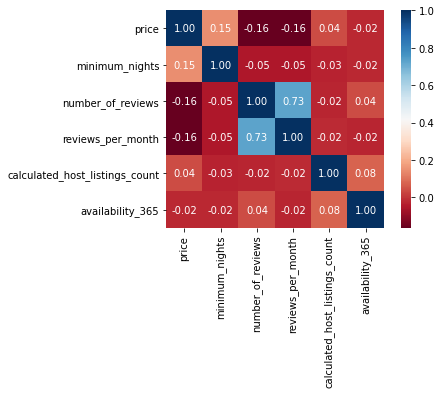

In [46]:
#Heatmap
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

##Q6. Qual o tipo de imóvel mais alugado?

Quando vamos alugar um imóvel podemos notar que eles se dividem em apartamentos, casas, quartos individuais e quartos compartilhados(2, 3 pessoas, etc)
Para responder a pergunta basta contar a coluna que informa os tipos de imóveis (room_type)

In [47]:
#Mostrando a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    22480
Private room        8918
Shared room          753
Hotel room           152
Name: room_type, dtype: int64

In [50]:
#Porcentagem de cada tipo de imóvel disponível
imoveis = df_clean.room_type.value_counts() / df_clean.shape[0]
print('{}'.format(imoveis*100))

Entire home/apt    69.591060
Private room       27.607343
Shared room         2.331053
Hotel room          0.470545
Name: room_type, dtype: float64


##Q7. Qual a localidade mais cara?
Nesse caso usaremos a função 'Groupby' para argupar as variaveis por bairro

In [51]:
#Agrupando por bairro
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Vaz Lobo                  879.666667
Engenheiro Leal           800.500000
Caju                      660.500000
Ricardo de Albuquerque    603.800000
Lagoa                     536.851964
Alto da Boa Vista         500.825000
Leblon                    497.938484
Jacarepaguá               487.762534
Abolição                  487.142857
Barra da Tijuca           484.151304
Name: price, dtype: float64

##Q8. Plotando o mapa com a localização/distribuição dos imóveis 

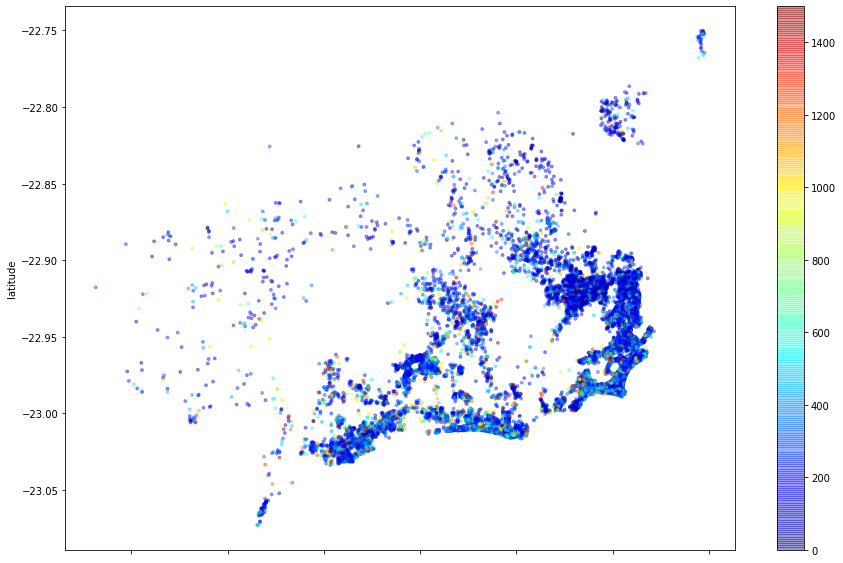

In [53]:
#Plotando os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(15,10));